 __Submitted by__: M. Hasnain Naeem (212728) from BSCS-7B, NUST 

# Digital Image Processing 
## Lab 5: Image Enhancement 

__Objective:__
In this exercise you try to improve the quality of an image by applying any of the technique of image enhancement you have studied so far.
    

 __Briefly write down the answers to following questions:-__

 1. write down the name of technique you used? 
    - Histogram Equalization
    - Power Law
 2. To what degree did you achieve the completeness of task? Please elaborate.
     - All the mentioned tasks were completed.
 3. To what degree did you manage to enhance your image? Please elaborate.
     - Histogram Equalization gave the best results. It almost recovered the photo.
     - Result achieved using power law is not close to the actual image but it is better than the image on which transformation was applied.
 4. why did you choose this particular technique? Back your answer with theoretical reasons. 
     - Because, histogram equalization automatically changes the contrast by distributing it over full range of intensity values. So, it works well for low and high contrast images.
     - Power law maps narrow range of dark values to a wider range (same can be done for bright intensities) through appropriate gamma value. Moreover, it can be used to make images brighter or darker by simple multiplication using constant "c". 
 5. Briefly describe your own contribution in today's lab. 
     - Automated the process of reading images from computer & process of transformation using Histogram Equalization. It will work even for 1000 images.
     - Plotted histograms for original & transformed images. Functions for this were coded from scratch.

In [64]:
import os
import math
import numpy as np
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
def get_gray_image(name, img_dir="files/imgs"):
    # open file and convert to grey scale
    filename = os.path.join(os.curdir, img_dir, name)
    
    img = cv2.imread(filename)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    return gray_img

In [66]:
def plot_intensity_hists(bins, intensity_counts, saving_dir, filename):
    save_loc = os.path.join(saving_dir, filename+"_intensity_histogram"+".jpg")

    plt.bar(bins, intensity_counts, color='#0504aa')
    
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Intensity Value')
    plt.ylabel('Intensity Value Count')
    plt.title("Intensity Value Histogram for "+filename)
    
    plt.savefig(save_loc, bbox_inches="tight", dpi=100)
    plt.show()

In [67]:
def get_intensity_counts(gray_img):
    intensity_count = np.zeros(256, "int")
    for i, row in enumerate(gray_img):
        for j, intensity_val in enumerate(row):
            intensity_count[intensity_val] += 1
    return intensity_count

### Read all the images in the given directory

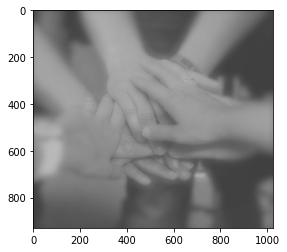

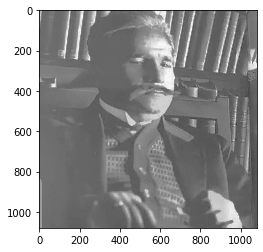

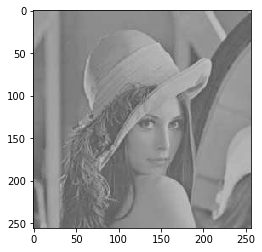

In [68]:
# get all the filenames in the directory
imgs_dir = os.path.join(os.curdir, "files", "imgs")
img_names = os.listdir("files/imgs")

# get filename --> gray_image mapping for future usage
gray_imgs = dict()
for img_name in img_names:
    gray_img = get_gray_image(img_name)
    gray_imgs[img_name] = gray_img
    plt.imshow(gray_img, cmap="gray", vmin=0, vmax=255)
    plt.show()

### Applying Technique # 1: Histogram Equalization

hands.png
**********
Original Image:


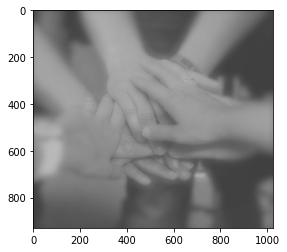

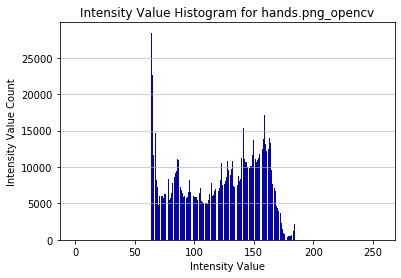

Image with Histogram Equalization:


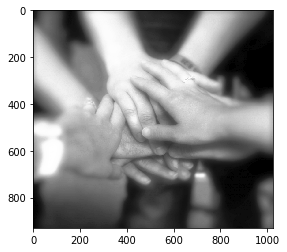

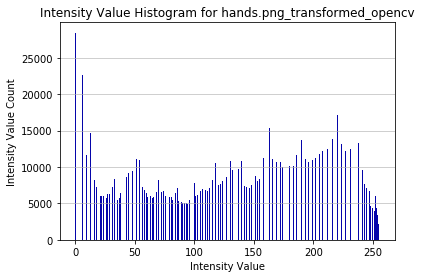

iqbal.jpg
**********
Original Image:


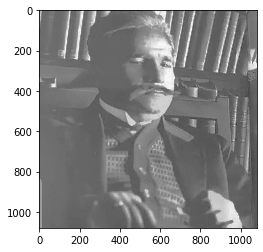

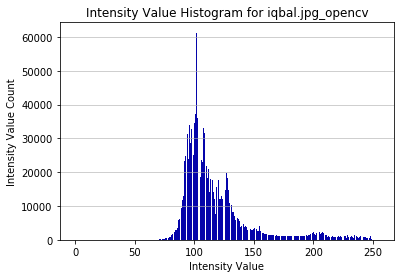

Image with Histogram Equalization:


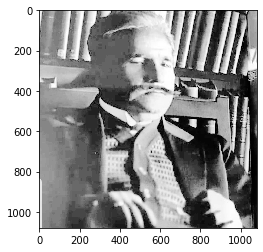

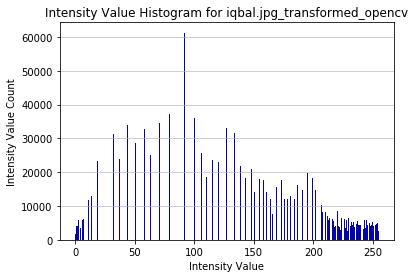

portrait.jpg
**********
Original Image:


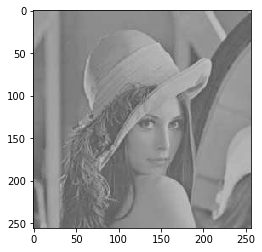

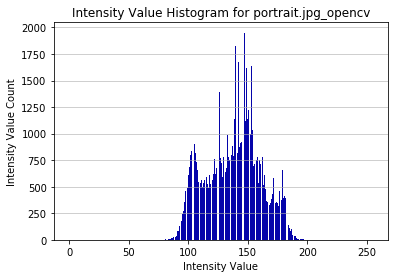

Image with Histogram Equalization:


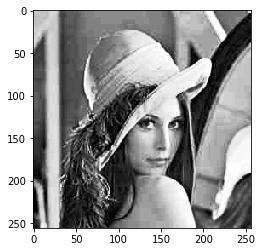

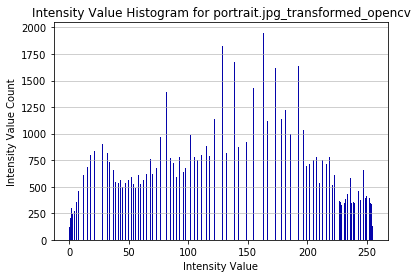

In [69]:
modified_img_dir = os.path.join(os.getcwd(), "modified")
task1_dir = os.path.join(modified_img_dir, "Histogram Equailization")

# create directories doesn't exist
if not os.path.exists(modified_img_dir):
    os.makedirs(modified_img_dir)
if not os.path.exists(task1_dir):
    os.makedirs(task1_dir)
    
bins = [i for i in range(256)] 
    
for img_name, img in gray_imgs.items():
    
    print(img_name)
    print("**********")
    print("Original Image:")
    plt.imshow(img, cmap="gray", vmin=0, vmax=255)
    plt.show()
    
    img_hist, bins_x = np.histogram(img,256,[0,256])
    # plot original histogram
    plot_intensity_hists(bins, img_hist, task1_dir, img_name+"_opencv")
    
    # apply histogram equalization
    transformed_img = cv2.equalizeHist(img)
    
    # display transformed image
    print("Image with Histogram Equalization:")
    plt.imshow(transformed_img, cmap="gray", vmin=0, vmax=255)
    plt.show()
    
    # save the transformed image
    # new file name & location
    new_path = os.path.join(task1_dir, img_name+"_transformed_opencv.jpg")
    plt.imsave(new_path, transformed_img, cmap="gray")
    
    # display and save histogram of transformed image
    transformed_img_hist = get_intensity_counts(transformed_img)
    plot_intensity_hists(bins, transformed_img_hist, task1_dir, img_name+"_transformed_opencv")    

### Technique 2: Power Law

In [70]:
def power_law(img, args):
    gamma_val = args["gamma_val"]
    c = args["c_val"]
    
    gamma_transformed_img = np.zeros(img.shape, "int")
    
    # transform all intensities
    for i, row in enumerate(img):
        for j, val in enumerate(row):
            # transform current intensity value
            gamma_transformed_img[i, j] = int(c * math.pow(val, gamma_val))
            
    return gamma_transformed_img

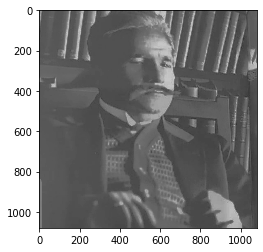

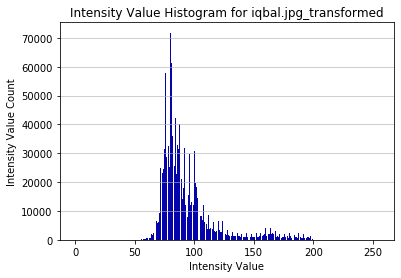

In [74]:
task2_dir = os.path.join(modified_img_dir, "Power Law")

# create directories doesn't exist
if not os.path.exists(task2_dir):
    os.makedirs(task2_dir)
    
img_name = "iqbal.jpg"
args = {"gamma_val": 1, "c_val": .8} 
transformed_img = power_law(gray_imgs[img_name], args)

new_path = os.path.join(task2_dir, img_name+"_transformed.jpg")
plt.imshow(transformed_img, cmap="gray", vmin=0, vmax=255)
plt.show()
plt.imsave(new_path, transformed_img, cmap="gray")

transformed_img_hist = get_intensity_counts(transformed_img)
plot_intensity_hists(bins, transformed_img_hist, task2_dir, img_name+"_transformed")    